In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 0. Bifurcation diagram:

$$x_{n+1} = r\cdot x_n(1-x_n)$$

$r\in (0,4)$

$x_n \in (0,1)$

## 1. Feigenbaum constants

In [2]:
c = 4.6692
rn_tab = [3.0, 1+np.sqrt(6)]

for _ in range(20):
    rn_tab.append( (rn_tab[-1]*(1+c) - rn_tab[-2])/c )

In [3]:
def plot_bifurcation_diagram(x0, y_min, y_max, r_min, r_max, m, p, delay):
    
    r_tab = np.linspace(r_min, r_max, m)

    fig, ax = plt.subplots(figsize = (18,8))
    ax.set_xlabel('r')
    ax.set_ylabel('x')
    ax.set_xlim(r_min, r_max)
    ax.set_ylim(y_min, y_max)

    for r in r_tab:
        x = x0
        for i in range(p + delay):
            x = r*x*(1-x)
            if i > delay:
                ax.scatter(r, x, s = 0.5, c='deeppink', alpha = 0.8)   
    
    for rn in rn_tab:
        ax.axvline(rn, c='black', alpha = 0.5)
    plt.show()

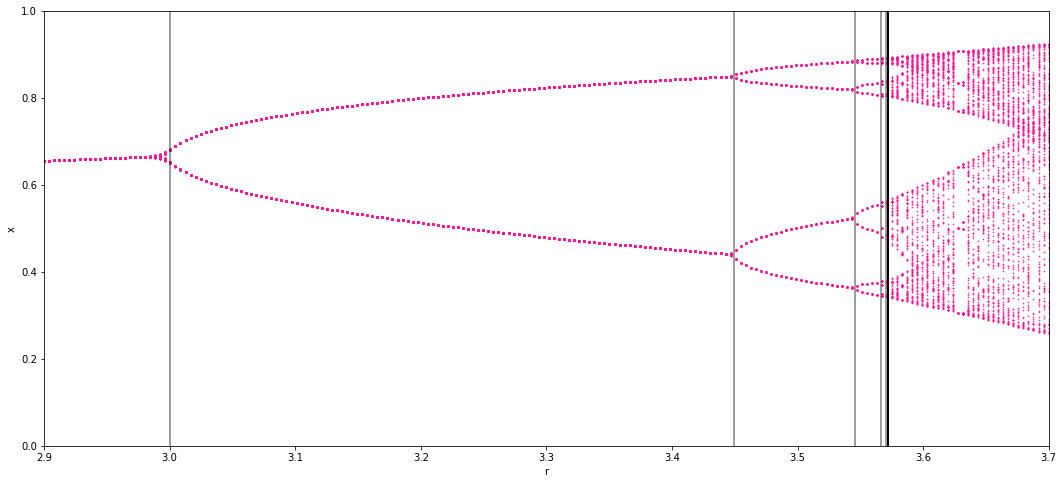

In [4]:
x0 = 0.23
r_min = 2.9
r_max = 3.7
m = 200

delay = 200  ## time delay
p = 200   ## number of points

r_tab = np.linspace(r_min, r_max, m)

y_min = 0.0
y_max = 1.0

plot_bifurcation_diagram(x0, y_min, y_max, r_min, r_max, m, p, delay)

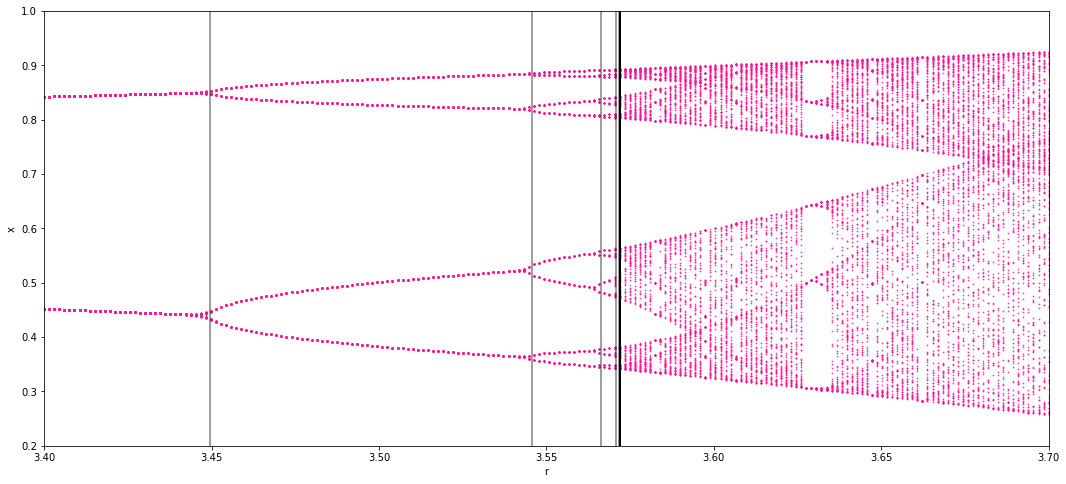

In [5]:
r_min = 3.4
r_max = 3.7
r_tab = np.linspace(r_min, r_max, m)

y_min = 0.2
y_max = 1.0

plot_bifurcation_diagram(x0, y_min, y_max, r_min, r_max, m, p, delay)

## 2. Lapunov exponent

In [6]:
x0 = 0.23
r_min = 0.1
r_max = 4.0
m = 200

delay = 200  ## time delay
p = 200   ## number of points

r_tab = np.linspace(r_min, r_max, m)

y_min = 0.0
y_max = 1.0

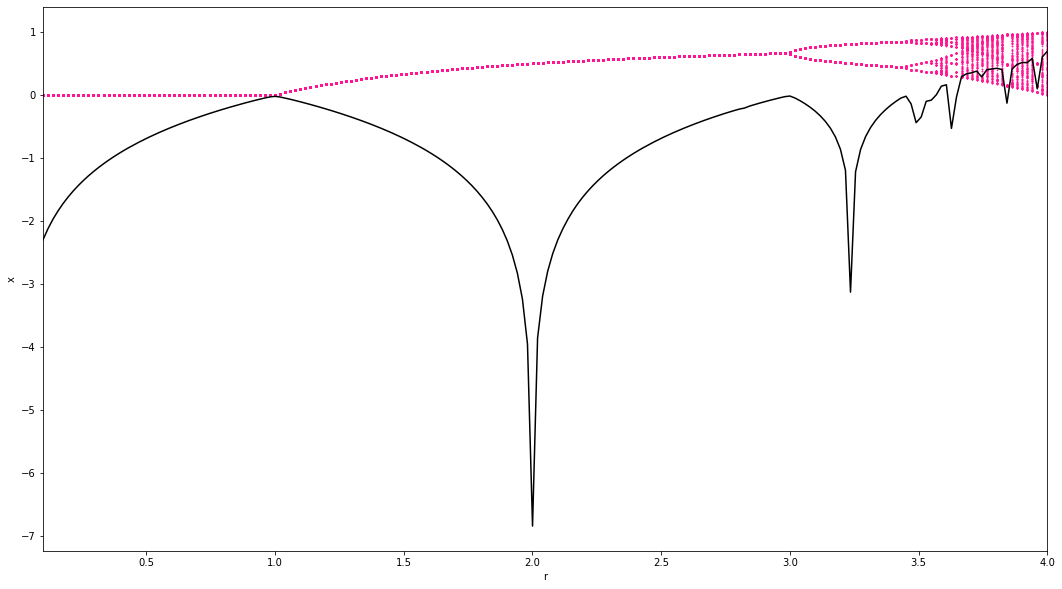

In [7]:
r_tab = np.linspace(r_min, r_max, m)
lambda_tab = []
    
fig, ax = plt.subplots(figsize = (18,10))
ax.set_xlabel('r')
ax.set_ylabel('x')
ax.set_xlim(r_min, r_max)

for r in r_tab:
    x = x0
    lambd = 0.0
    
    for i in range(p + delay):
        lambd += np.log( r*abs(1-2*x) )
        
        
        x = r*x*(1-x)
        if i > delay:
            ax.scatter(r, x, s = 0.5, c='deeppink', alpha = 0.8)       
    lambda_tab.append(lambd/(p+delay))
    
ax.plot(r_tab, lambda_tab, color = 'black')    

### calculations:

$$\lambda \approx \frac{1}{n}\sum_{i=0}^{n-1} \ln(|r(1-2x_i)|)$$

for logistic equation we have:
* period-1 orbit at fixed points $p=0$ and $p=1-\frac{1}{r}$
* period-2 orbit at fixed points $p=0$, $p=1-\frac{1}{r}$, $p = \frac{r+1 \pm \sqrt{(r^2-2r-3)}}{2r}$

Therefore:
* for $0<r<1$  we have $lim_{n-> \infty} x_i = 0$ and $\lambda \approx \ln(|r(1-0)|) = \ln(r)$


* for $1<r<3$  we have  $lim_{n-> \infty} x_i = 1-\frac{1}{r}$ and $\lambda \approx \ln(|r(1-2(1-\frac{1}{r}))| = \ln(|r-2|)$


* for $3<r< 1+\sqrt{6}$ we have  $lim_{n->\infty} x_i = \frac{r+1 \pm \sqrt{(r^2-2r-3)}}{2r}$ and:

$$  \lambda \approx \frac{n-1}{2n} \left( \ln(|r(1-2 \frac{r+1 + \sqrt{(r^2-2r-3)}}{2r})|) +  \ln(|r(1-2 \frac{r+1 - \sqrt{(r^2-2r-3)}}{2r})|) \right) = \frac{1}{2} \ln (|-r^2 +2r+4|)$$


In [8]:
lambda_theoretic_tab = []

for r in r_tab:
    
    if r<1:
        lambda_theoretic_tab.append(np.log(r))
    
    elif r<3:
        lambda_theoretic_tab.append(np.log( abs(r-2)))
        
    elif r< 1+np.sqrt(6):
        lambda_theoretic_tab.append(0.5* np.log( abs(-r**2 + 2*r + 4) ))
    
    else:
        lambda_theoretic_tab.append(0)

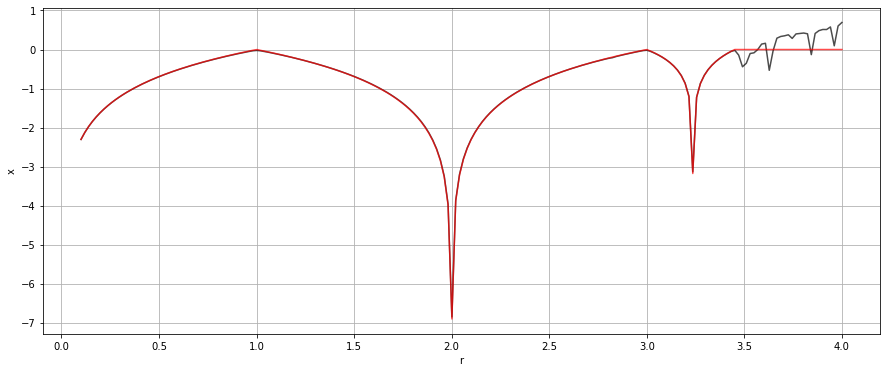

In [9]:
fig, ax = plt.subplots(figsize = (15,6))
ax.set_xlabel('r')
ax.set_ylabel('x')
ax.grid(True)
ax.plot(r_tab, lambda_tab, color = 'black', alpha = 0.7)    
ax.plot(r_tab, lambda_theoretic_tab, color = 'red', alpha = 0.7)    

## 3. super stable cycles for logistic map

superstable n-cycle: $f^n(p) = p  $ and $\frac{df^n}{dx}|_{x=p}=0$

In [10]:
import sympy
from sympy import Function, Symbol, N

x = Symbol('x')
r = Symbol('r')

def f(x, r):
    return r*x*(1-x)

def f1(x,r):
    return  f(x,r)

def f2(x,r):
    return  f(f(x,r),r)

def f3(x,r):
    return  f(f(f(x,r),r),r)

def f4(x,r):
    return  f(f(f(f(x,r),r),r),r)

def f5(x,r):
    return  f(f(f(f(f(x,r),r),r),r),r)

In [11]:
## period-1 cycle:

sol_fixed_x = sympy.solve(f(x,r)-x, x)
sol_extremum_x = sympy.solve(f(x,r).diff(x), x)

for fixed_x in sol_fixed_x:
    for extremum_x in sol_extremum_x:   
        sol_r = sympy.solve(fixed_x - extremum_x, r)
        if len(sol_r)>0:
            rr = N(sol_r[0])
            print("r = {:.3f}, x* = {:.3f}".format( rr, fixed_x.subs(r, rr) ))

r = 2.000, x* = 0.500


In [12]:
## period-2 cycle:

sol_fixed_x = sympy.solve(f2(x,r)-x, x)
sol_extremum_x = sympy.solve(f2(x,r).diff(x), x)

for fixed_x in sol_fixed_x:
    for extremum_x in sol_extremum_x:   
        sol_r = sympy.solve(fixed_x - extremum_x, r)
        if len(sol_r)>0:
            rr = N(sol_r[0])
            print("r = {:.3f}, x* = {:.3f}".format( rr, fixed_x.subs(r, rr) ))

r = 2.000, x* = 0.500
r = 2.000, x* = 0.500
r = 2.000, x* = 0.500
r = -1.236, x* = 0.500
r = -1.236, x* = -0.309


In [13]:
## period-3 cycle:

sol_fixed_x = sympy.solve(f3(x,r)-x, x)
sol_extremum_x = sympy.solve(f3(x,r).diff(x), x)


for fixed_x in sol_fixed_x:
    for extremum_x in sol_extremum_x:   
        sol_r = sympy.solve(fixed_x - extremum_x, r)
        if len(sol_r)>0:
            rr = N(sol_r[0])
            print("r = {:.3f}, x* = {:.3f}".format( rr, fixed_x.subs(r, rr) ))

KeyboardInterrupt: 

In [14]:
## period-4 cycle:

sol_fixed_x = sympy.solve(f4(x,r)-x, x)
sol_extremum_x = sympy.solve(f4(x,r).diff(x), x)


for fixed_x in sol_fixed_x:
    for extremum_x in sol_extremum_x:   
        sol_r = sympy.solve(fixed_x - extremum_x, r)
        if len(sol_r)>0:
            rr = N(sol_r[0])
            print("r = {:.3f}, x* = {:.3f}".format( rr, fixed_x.subs(r, rr) ))

KeyboardInterrupt: 

In [ ]:
## period-5 cycle:

sol_fixed_x = sympy.solve(f5(x,r)-x, x)
sol_extremum_x = sympy.solve(f5(x,r).diff(x), x)


for fixed_x in sol_fixed_x:
    for extremum_x in sol_extremum_x:   
        sol_r = sympy.solve(fixed_x - extremum_x, r)
        if len(sol_r)>0:
            rr = N(sol_r[0])
            print("r = {:.3f}, x* = {:.3f}".format( rr, fixed_x.subs(r, rr) ))